In [1]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams["figure.figsize"] = (6,6)

In [3]:
import numpy as np
import torch
from sklearn import datasets

# Simple gradients on tensors

In [4]:
a = torch.ones((3,2), requires_grad=True)
b = torch.ones((3,2), requires_grad=True)

In [5]:
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)

In [6]:
b

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)

In [7]:
c = (5 * a + 2 * b).sum()

In [8]:
c

tensor(42., grad_fn=<SumBackward0>)

In [11]:
a.grad

None


In [10]:
b.grad

The function is this:

$$
c = \sum_{ij} 5a_{ij}
$$

The gradient:

$$
    \frac{\partial c}{\partial a_{ij}} = \frac{\partial}{\partial a_{ij}}\sum_{km} 5a_{km} = 5 \sum_{km} \delta_{ik}\delta_{mj}  = 5
$$

In [13]:
print(c)

tensor(42., grad_fn=<SumBackward0>)


In [14]:
a.grad is None

True

In [15]:
c.backward()

In [16]:
a.grad # partial derivative of function c over a

tensor([[5., 5.],
        [5., 5.],
        [5., 5.]])

In [17]:
b.grad

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])

In [29]:
# gradients are accumulated in PyTorch, and this is a way to wipe them
a.grad.zero_()
b.grad.zero_()

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

# Logistic regression example

In [30]:
X, y = datasets.make_blobs(1000, centers=[[-3, -3], [0, 0]], cluster_std=1.25)

C:\Users\itay8\AppData\Local\Temp\ipykernel_14684\4201878768.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


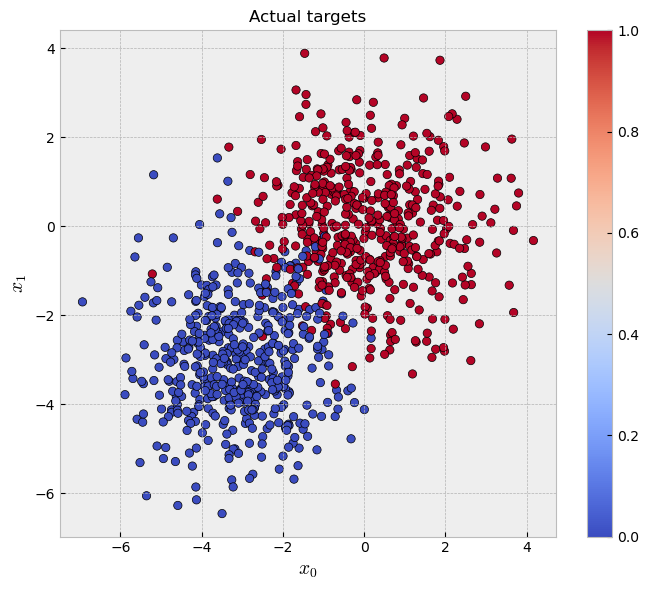

In [31]:
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [32]:
Xt = torch.tensor(X, dtype=torch.float)
yt = torch.tensor(np.expand_dims(y, axis=-1), dtype=torch.float)

Sigmoid activation function is defined as:
    
$$
\sigma (x) = \frac{1}{1+e^{-x}}
$$

Text(0.5, 1.0, 'Sigmoid function')

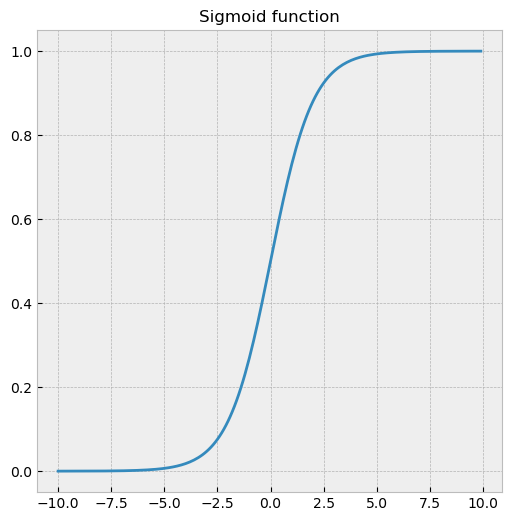

In [33]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, 1/(1+np.exp(-x)))
plt.title("Sigmoid function", fontsize=12)

In [34]:
def sigmoid(a):
    """Sigmoid activation function."""

    return 1/(1 + (-a).exp())

In [35]:
X

array([[-1.38525968, -0.29330159],
       [-3.46974672, -4.4531021 ],
       [-0.67148878,  0.76059161],
       ...,
       [-0.4601015 ,  0.01877846],
       [ 1.26519083, -0.48344852],
       [-3.72464145, -1.36373538]])

In [36]:
y

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [37]:
W = torch.randn(2, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

In [38]:
W, b

(tensor([[ 0.2713],
         [-0.4259]], requires_grad=True),
 tensor([[-0.1300]], requires_grad=True))

## Meaning of $W$ and $b$

C:\Users\itay8\AppData\Local\Temp\ipykernel_14684\1805935680.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
C:\Users\itay8\AppData\Local\Temp\ipykernel_14684\1805935680.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


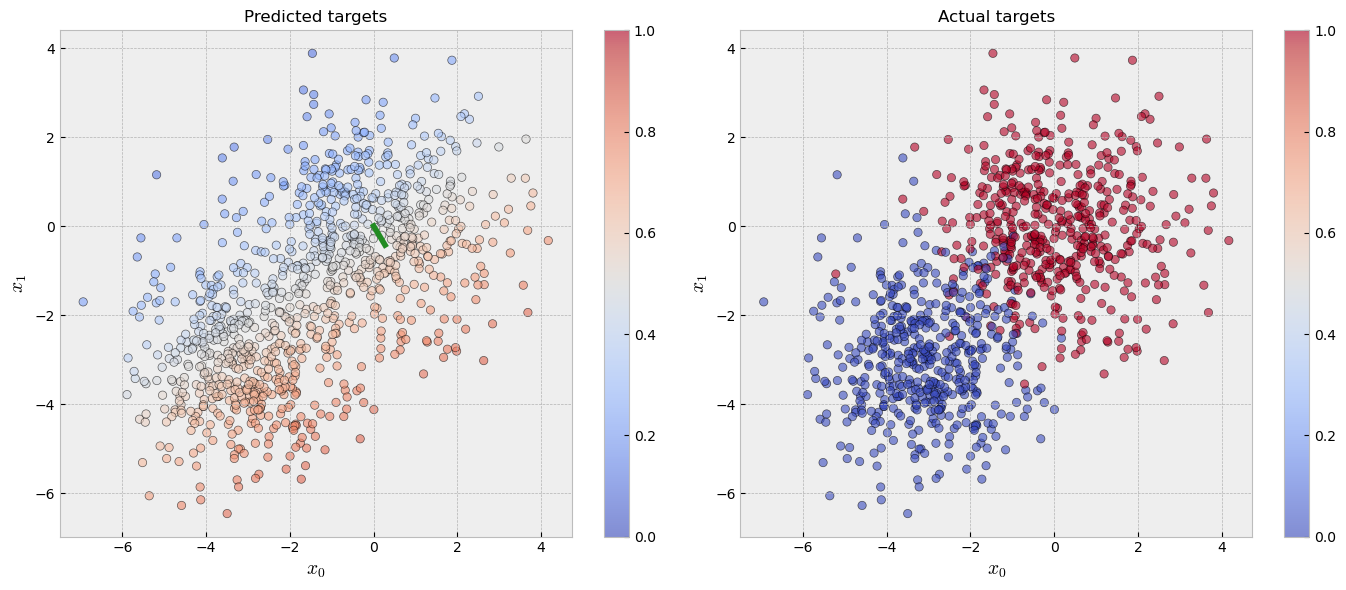

In [39]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [40]:
W = torch.Tensor([[1], [1]])

C:\Users\itay8\AppData\Local\Temp\ipykernel_14684\1805935680.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
C:\Users\itay8\AppData\Local\Temp\ipykernel_14684\1805935680.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


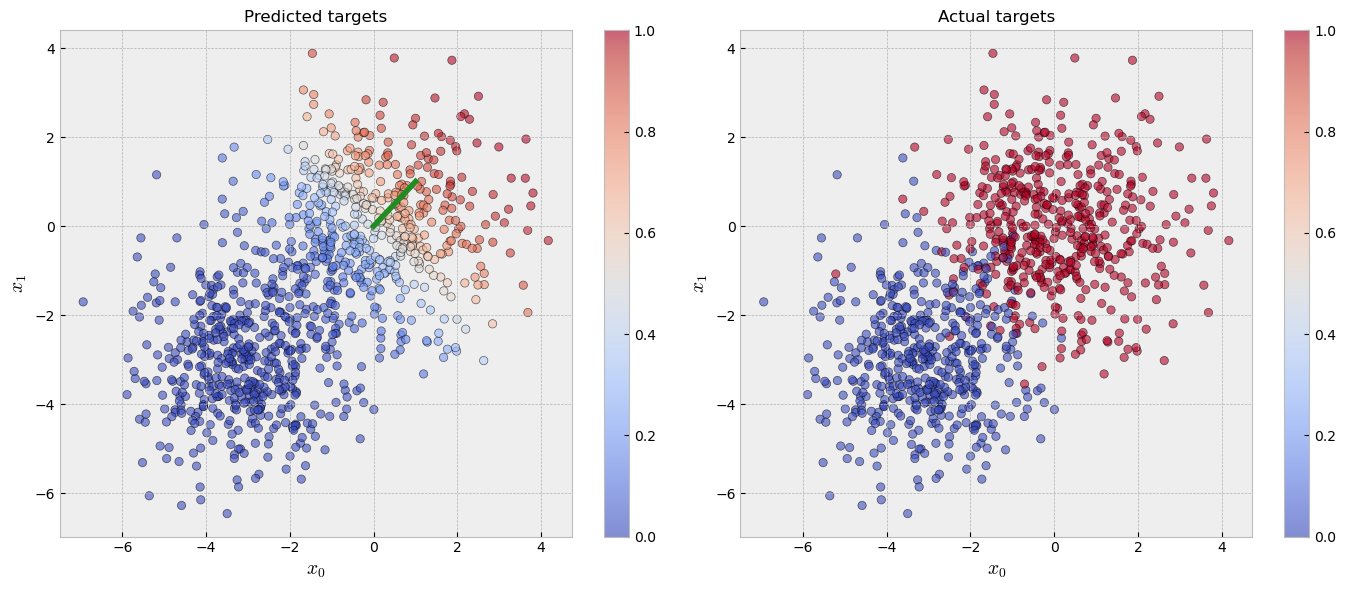

In [41]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [42]:
b = torch.Tensor([[3]])
b

tensor([[3.]])

C:\Users\itay8\AppData\Local\Temp\ipykernel_14684\1805935680.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
C:\Users\itay8\AppData\Local\Temp\ipykernel_14684\1805935680.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


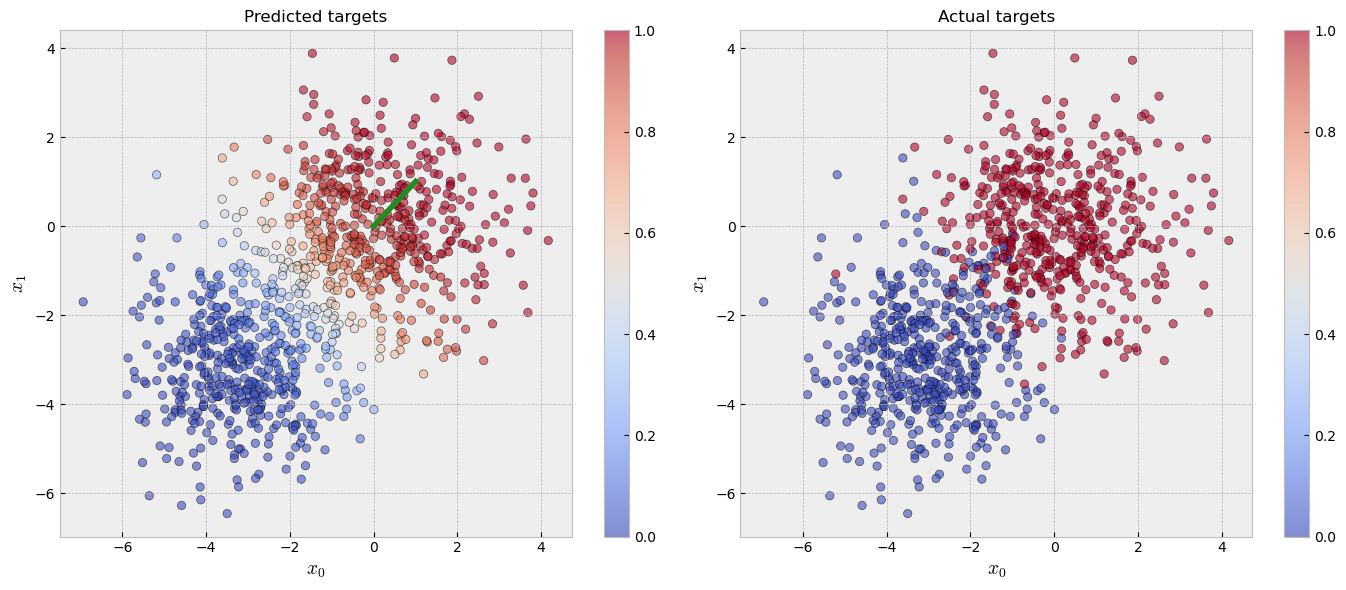

In [43]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [44]:
# let's try to decrease the values of W and b. It will make the boundry transition slower (wide boundry) 
W = torch.Tensor([[0.33], [0.33]])
b = torch.Tensor([[1]])
b

tensor([[1.]])

C:\Users\itay8\AppData\Local\Temp\ipykernel_14684\1805935680.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
C:\Users\itay8\AppData\Local\Temp\ipykernel_14684\1805935680.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


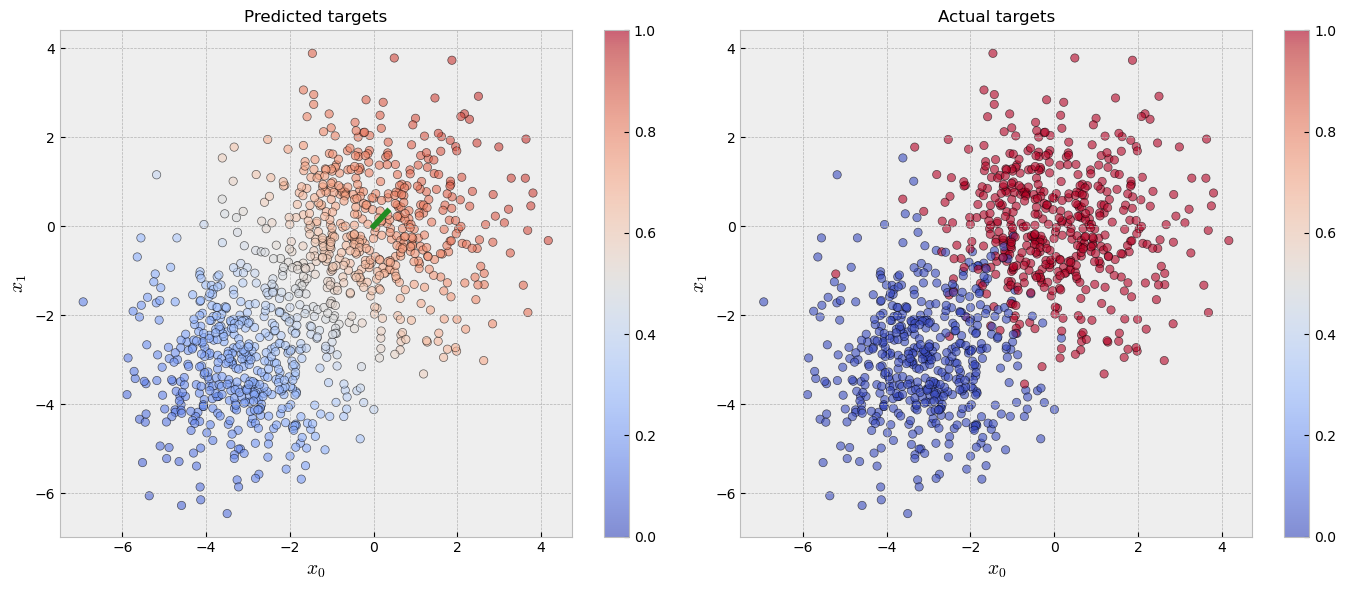

In [45]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [46]:
# let's try to increase the values of W and b. It will make the boundry transition faster (hard/narrow boundry) 
W = torch.Tensor([[5], [5]])
b = torch.Tensor([[15]])

C:\Users\itay8\AppData\Local\Temp\ipykernel_14684\1805935680.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
C:\Users\itay8\AppData\Local\Temp\ipykernel_14684\1805935680.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


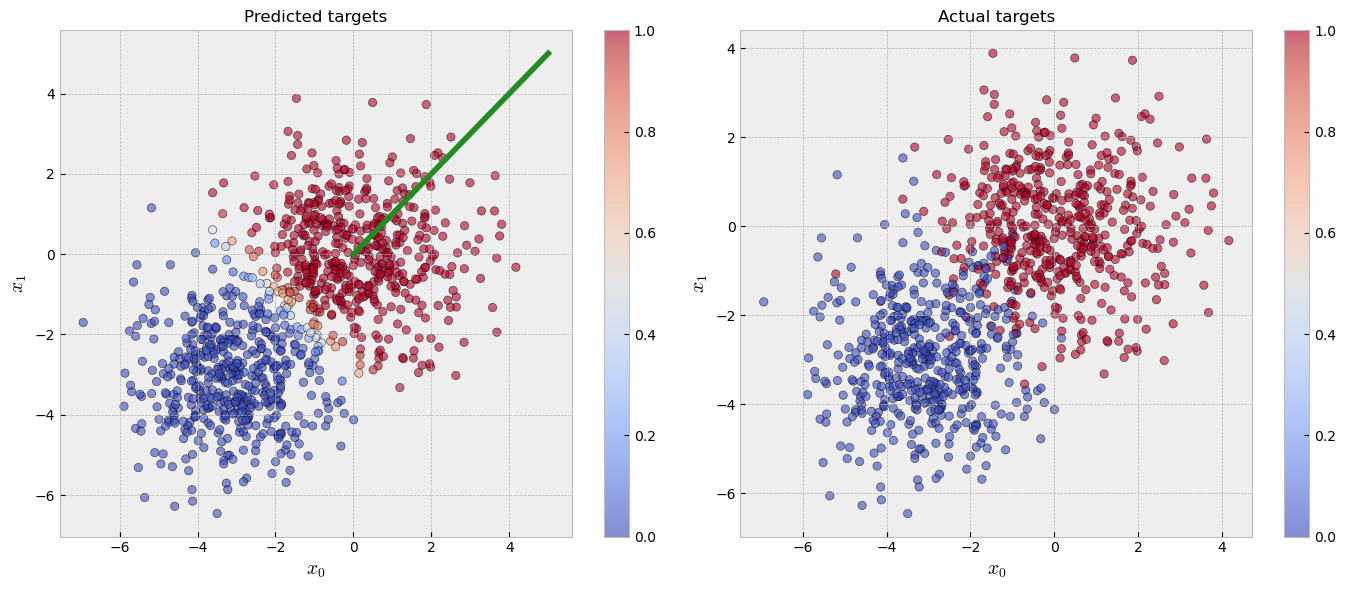

In [47]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

## Log-loss

$$
L = - \frac{1}{N} \sum_k \left(y_k \log\left(\hat y_k\right) + \left(1 - y_k\right) \log\left(1 - \hat y_k\right)\right)
$$

$$
\hat y_i = \sigma(X_{ik}W_{k}+b)
$$

In [48]:
W = torch.randn(2, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

In [49]:
def output(x, w, b):
    return sigmoid(torch.mm(x, w) + b)

def logloss(y, y_pred):
    return -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()

In [50]:
y_pred = output(Xt, W, b)
loss = logloss(yt, y_pred)
loss.item(), (-loss).exp().item()

(1.2300126552581787, 0.2922888696193695)

Estimate probability:

$$
L = - \frac{1}{N} \sum_k (y_k \log(\hat y_k) + (1 - y_k) \log(1 - \hat y_k)) = -\langle\log P\rangle \approx -\log \langle P\rangle
$$

Hence:

$$
\langle P\rangle \approx e^{-L}
$$


In [52]:
EPOCHS = 1000
LR = 1e-1
DELTA = 0.00001
loss_history = []

for i in range(EPOCHS):
    y_pred = output(Xt, W, b)
    loss = logloss(yt, y_pred)
    loss.backward()
    
    loss_history.append(loss.item())

    with torch.no_grad():
        W.sub_(LR * W.grad)
        b.sub_(LR * b.grad)
    W.grad.zero_()
    b.grad.zero_()

    if i % 20 == 0:
        print(f"Epoch {i}: loss = {loss_history[-1]}")
    
    try:
        if loss_history[-2] - loss_history[-1] < DELTA:
            break
    except:
        pass

tensor([[1.4130],
        [1.2835]], requires_grad=True) tensor([[-0.0041],
        [-0.0035]])
W tensor([[1.4134],
        [1.2839]], requires_grad=True) tensor([[0.],
        [0.]])

Epoch 0: loss = 0.1208900734782219
tensor([[1.4134],
        [1.2839]], requires_grad=True) tensor([[-0.0041],
        [-0.0035]])
W tensor([[1.4138],
        [1.2843]], requires_grad=True) tensor([[0.],
        [0.]])

tensor([[1.4138],
        [1.2843]], requires_grad=True) tensor([[-0.0041],
        [-0.0035]])
W tensor([[1.4142],
        [1.2846]], requires_grad=True) tensor([[0.],
        [0.]])

tensor([[1.4142],
        [1.2846]], requires_grad=True) tensor([[-0.0041],
        [-0.0035]])
W tensor([[1.4146],
        [1.2850]], requires_grad=True) tensor([[0.],
        [0.]])

tensor([[1.4146],
        [1.2850]], requires_grad=True) tensor([[-0.0041],
        [-0.0035]])
W tensor([[1.4150],
        [1.2853]], requires_grad=True) tensor([[0.],
        [0.]])

tensor([[1.4150],
        [1.2853]], req

C:\Users\itay8\AppData\Local\Temp\ipykernel_14436\3088234621.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
C:\Users\itay8\AppData\Local\Temp\ipykernel_14436\3088234621.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


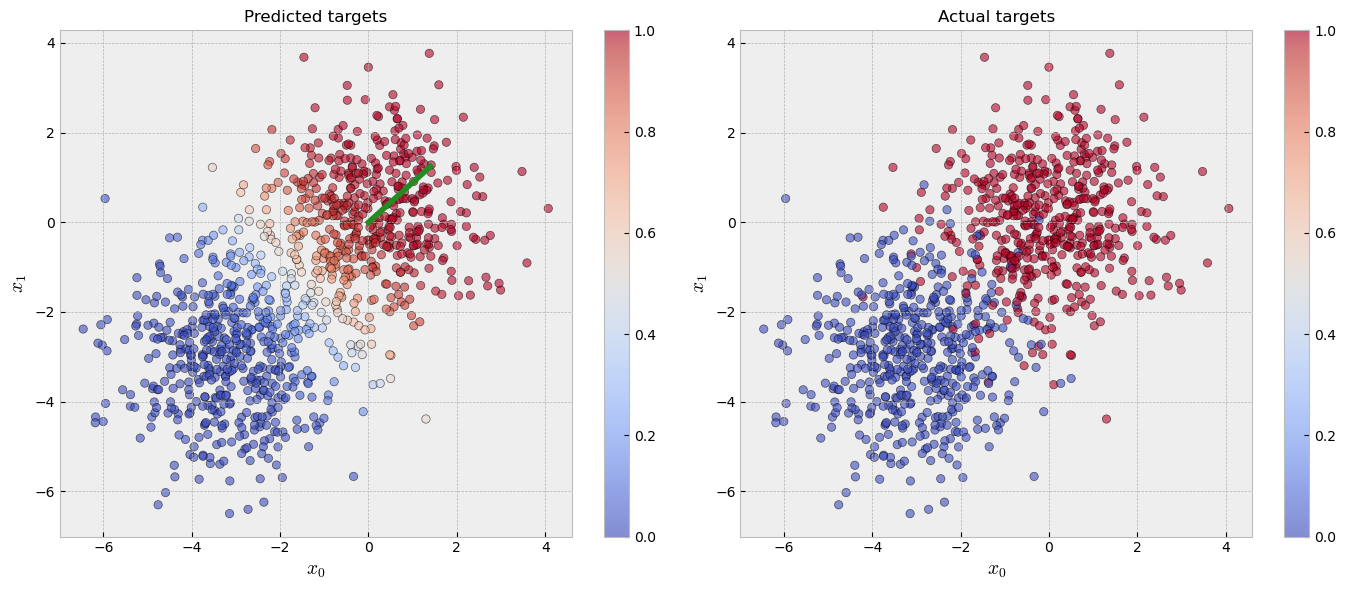

In [44]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [45]:
W, b

(tensor([[1.4013],
         [1.2442]], requires_grad=True),
 tensor([[3.7687]], requires_grad=True))

Text(0, 0.5, 'loss')

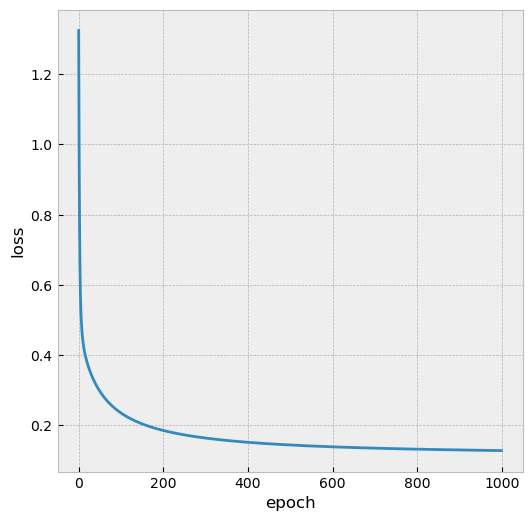

In [46]:
plt.figure(figsize=(6,6))
plt.plot(loss_history)
plt.xlabel("epoch")
plt.ylabel("loss")

In [102]:
y_ = y_pred.detach().numpy().flatten()

# Classification metrics

In [103]:
from sklearn.metrics import classification_report

In [104]:
y_class = (y_ >= 0.5).astype(int)

In [105]:
print(classification_report(y, y_class))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       500
           1       0.95      0.94      0.95       500

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



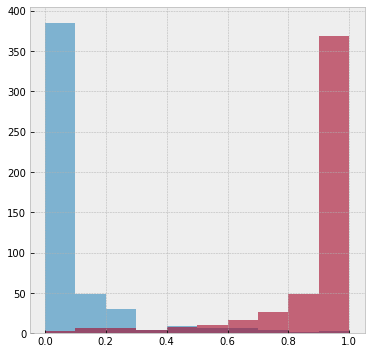

In [108]:
plt.hist(y_[y==0], range=(0,1), alpha=0.6)
plt.hist(y_[y==1], range=(0,1), alpha=0.6);

In [112]:
np.mean((y_>0.5).astype(int) == y) # manual accuracy calculation

0.949